In [1]:
import numpy as np
from scipy.ndimage.filters import uniform_filter1d
import matplotlib.pyplot as plt

C:\Users\Felipe\AppData\Local\Temp\ipykernel_3108\2994644319.py:2: DeprecationWarning: Please use `uniform_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter1d


In [2]:
pi = """
1415926535 8979323846 2643383279 5028841971 6939937510 5820974944 
5923078164 0628620899 8628034825 3421170679 8214808651 3282306647 
0938446095 5058223172 5359408128 4811174502 8410270193 8521105559 
6446229489 5493038196 4428810975 6659334461 2847564823 3786783165 
2712019091 4564856692 3460348610 4543266482 1339360726 0249141273 
7245870066 0631558817 4881520920 9628292540 9171536436 7892590360 
0113305305 4882046652 1384146951 9415116094 3305727036 5759591953 
0921861173 8193261179 3105118548 0744623799 6274956735 1885752724 
8912279381 8301194912 9833673362 4406566430 8602139494 6395224737 
1907021798 6094370277 0539217176 2931767523 8467481846 7669405132 
0005681271 4526356082 7785771342 7577896091 7363717872 1468440901 
2249534301 4654958537 1050792279 6892589235 4201995611 2129021960 
8640344181 5981362977 4771309960 5187072113 4999999837 2978049951 
0597317328 1609631859 5024459455 3469083026 4252230825 3344685035 
2619311881 7101000313 7838752886 5875332083 8142061717 7669147303 
5982534904 2875546873 1159562863 8823537875 9375195778 1857780532 
1712268066 1300192787 6611195909 2164201989
"""
pi = pi.replace(" ","").replace("\n","")


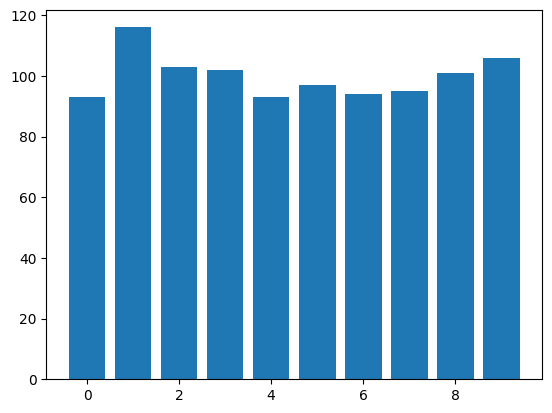

In [3]:
pi_np = np.array(list(pi), dtype=np.int8)
np.unique(pi_np, return_counts=True)
plt.bar(np.arange(10), np.unique(pi_np, return_counts=True)[1])
plt.show()


In [4]:
def get_seed(pi_digits, seed_length):
    start = np.random.randint(0, len(pi_digits))
    if start + seed_length > len(pi_digits):
        seed = pi_digits[start:] + pi_digits[:start+seed_length-len(pi_digits)]
    else:
        seed = pi_digits[start:start+seed_length]
    return seed


def get_secuence(seed):
    seed_s = seed*3
    secuences = []
    for s in range(0, len(seed_s), 3):
        secuences.append(seed_s[s:s+3])
    return np.array(secuences)


def get_random_num(secuences):
    num_list = [pi[int(x)] for x in secuences]
    num = (''.join(num_list))
    return num
    

In [5]:
get_random_num(get_secuence('97217732525')) 

'05226861483'

(array([ 75., 100.,  84.,  96.,  99.,  45.,  78., 100., 103.,  77., 156.,
        144., 135.,  86., 100.,  93., 135., 117.,  95., 120.,  63.,  75.,
        113.,  94., 106.,  78.,  92., 117.,  35.,  94., 100., 127., 106.,
         57.,  78.,  74., 109.,  87.,  56.,  77., 109.,  86.,  77.,  91.,
         99., 100., 120., 121.,  90., 101.,  81.,  68.,  85., 110.,  62.,
        169.,  72.,  60., 127., 108., 125.,  90., 113.,  86.,  53.,  66.,
         56.,  98.,  61., 126.,  45., 142.,  85.,  87.,  87., 126.,  67.,
        109.,  64.,  84.,  68.,  80., 105., 145.,  89., 113.,  85.,  84.,
        107.,  83., 111., 120., 115.,  69., 138., 123.,  96.,  93.,  95.,
        109.,  98., 120.,  72., 115., 167., 110.,  76.,  97., 121., 129.,
        126., 128.,  87., 146.,  88., 162., 146.,  68.,  97., 187., 112.,
        132., 128., 187.,  98., 109., 114., 103.,  74., 146., 101., 141.,
        125.,  91.,  80., 140., 144.,  91., 118.,  93.,  77.,  95., 111.,
        122.,  60., 105., 118., 105., 

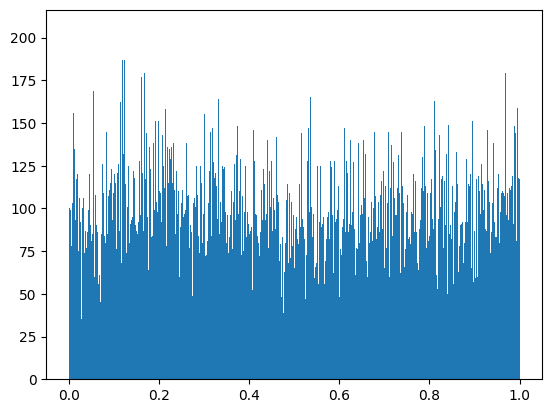

In [11]:
values= [get_seed(pi, 11)]
for _ in range(100000):
    values.append(str(get_random_num(get_secuence(values[-1]))))
nums = [int(x) for x in values]
nums1=[x/99999999999 for x in nums]

plt.hist(nums1, bins=1000)

100001

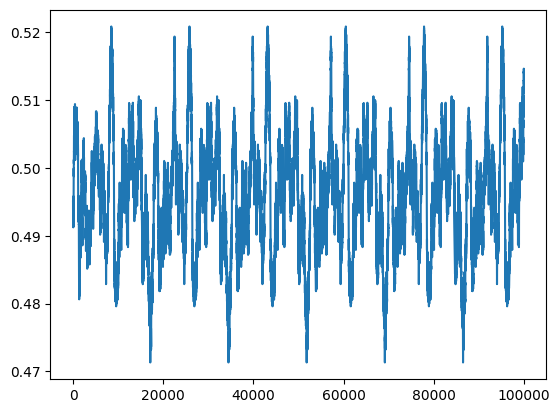

In [25]:
avg_data = uniform_filter1d(nums1, size=1000)
plt.plot(avg_data)
len(avg_data)

0.5208655690331189

In [36]:
np.where(avg_data == avg_data.max())[0]

array([8487], dtype=int64)

In [45]:
f = lambda: get_random_num(get_secuence(get_seed(pi, 11)))

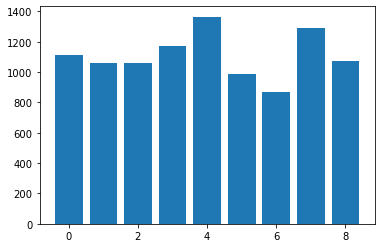

[0 1 2 3 4 5 6 7 8] [1114 1063 1062 1175 1365  989  868 1290 1074]


In [55]:
ramdom_nums = []
for i in range(10000):
    num = f()%9
    ramdom_nums.append(int(num))

y = np.unique(ramdom_nums, return_counts=True)[1]
x = np.unique(ramdom_nums, return_counts=True)[0]
plt.bar(x, y)
plt.show()
print(x,y)

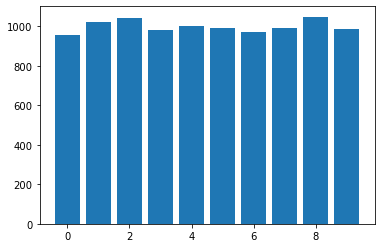

[0 1 2 3 4 5 6 7 8 9] [ 956 1022 1040  984 1002  993  973  993 1049  988]


In [496]:
ramdom_nums = []
for i in range(10000):
    ramdom_nums.append(int(np.random.random()*10))

y = np.unique(ramdom_nums, return_counts=True)[1]
x = np.unique(ramdom_nums, return_counts=True)[0]
plt.bar(x, y)
plt.show()
print(x,y)